In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import io as fio

fname = 'C:/Users/styler/workspace/illah/20100227.gpx'

ft = fio.open(fname)

ft.close()

IOError: [Errno 2] No such file or directory: 'C:/Users/styler/workspace/illah/20100227.gpx'

In [16]:
import xml.etree.ElementTree as ET 
tree = ET.parse(fname) 
root = tree.getroot()

In [17]:
print root.keys

<bound method Element.keys of <Element '{http://www.topografix.com/GPX/1/1}gpx' at 0xeac81d0>>


In [18]:
root.attrib

{'creator': '',
 'version': '1.1',
 '{http://www.w3.org/2001/XMLSchema-instance}schemaLocation': 'http://www.topografix.com/GPX/1/1 http://www.topografix.com/GPX/1/1/gpx.xsd'}

In [19]:
def get_element_by_tag(element, tag):
    if element.tag.endswith(tag):
        yield element
    for child in element:
        for g in get_element_by_tag(child, tag):
            yield g

In [20]:
def stripnamespace(xmltree):
    for node in xmltree.getiterator():
        if '}' in node.tag:
            node.tag = node.tag.split('}', 1)[1]

In [21]:
stripnamespace(root)
root.getchildren()

[<Element 'trk' at 0xeac8f60>,
 <Element 'trk' at 0xec37c88>,
 <Element 'trk' at 0xec414a8>,
 <Element 'trk' at 0xed773c8>,
 <Element 'trk' at 0xed83668>]

In [22]:
root.getchildren()[1].getchildren()[1].getchildren()[0].getchildren()[1].text


'2010-02-27T22:36:44Z'

In [23]:
vals = list()
for node in root.iter('trkpt'):
    vals.append(dict(node.items()+[('ele',node.getchildren()[0].text),('time',node.getchildren()[1].text)]))
    
     

In [24]:
lats = [val['lat'] for val in vals]
lons = [val['lon'] for val in vals]

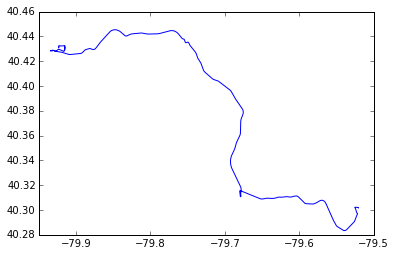

In [25]:
plt.plot(lons,lats)

In [2]:
import pandas
fname2 = '/Users/astyler/projects/ChargeCarData/csv/illah20100227_1.csv'
df = pandas.read_csv(fname2)
df.dtypes
#convert_numeric=True)


Latitude           float64
Longitude          float64
Elevation          float64
Bearing            float64
PlanarDistance     float64
Speed              float64
Acceleration       float64
Power              float64
TotalEnergyUsed    float64
PeriodMS             int64
Time                 int64
dtype: object

In [3]:
df.head()

,Latitude,Longitude,Elevation,Bearing,PlanarDistance,Speed,Acceleration,Power,TotalEnergyUsed,PeriodMS,Time
0,40.429277,-79.915235,414.87,-0.73,7.47,7.474,0.000,5044.7621,0.0000,1000,1267328212000
1,40.429232,-79.915169,415.15,-0.73,7.47,7.474,0.000,5044.7826,1.4013,1000,1267328213000
2,40.429187,-79.915104,415.44,-0.76,5.49,5.508,-1.965,-7649.4367,2.8027,1000,1267328214000
3,40.429153,-79.915057,414.96,-0.64,3.17,3.187,-2.322,-1559.9135,0.6778,1000,1267328215000
4,40.429136,-79.915027,415.33,-0.64,3.17,3.187,0.000,5118.6085,0.2445,1000,1267328216000


<IPython.core.display.Javascript object>


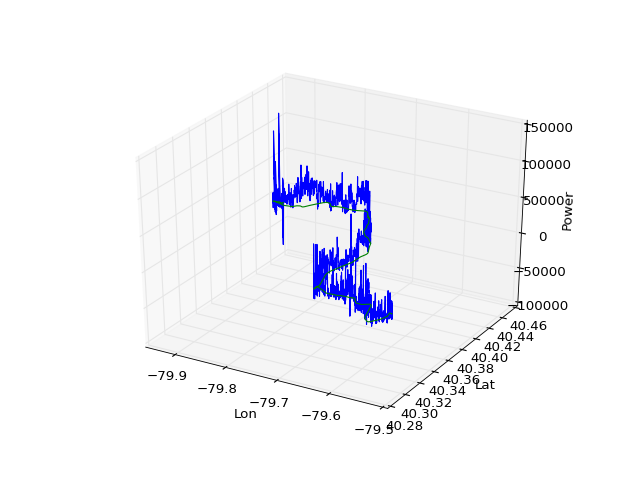

In [4]:
#%pylab inline
#df.plot(x='Longitude',y='Latitude',c='Power')
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

p = plt.figure().gca(projection='3d')
p.plot(df.Longitude, df.Latitude, df.Power)
p.set_xlabel('Lon')
p.set_ylabel('Lat')
p.set_zlabel('Power')
plt.show()


<IPython.core.display.Javascript object>


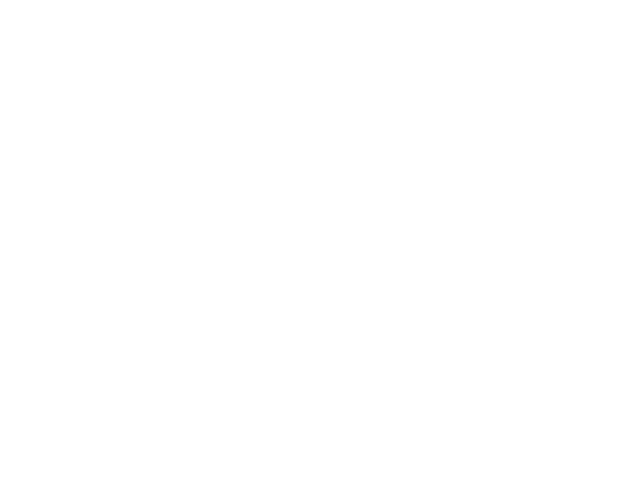

In [9]:
p2 = plt.figure()

p.plot(df.Longitude, df.Latitude)
plt.show()

In [38]:
bp.show(p2)

In [35]:
import plotly.plotly as py
from plotly.graph_objs import *
data = [Scatter3d(x=df.Longitude, y=df.Latitude, z=df.Power,mode='lines')]
py.iplot(data, filename = 'basic-line')